In [1]:
import pickle
def load_variavle(filename):
  f=open(filename,'rb')
  r=pickle.load(f)
  f.close()
  return r

In [2]:
data = load_variavle('slices.pkl')
print(data)

[array([[13.064,  6.086, 12.   , ...,  0.   ,  0.   ,  0.   ],
       [12.116,  7.015,  7.   , ...,  1.   ,  0.   ,  0.   ],
       [13.945,  6.999, 15.   , ...,  0.   ,  0.   ,  1.   ],
       ...,
       [20.063, 24.964,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [19.007, 25.045,  1.   , ...,  0.   ,  0.   ,  0.   ],
       [21.957, 25.871,  5.   , ...,  1.   ,  0.   ,  0.   ]]), array([[17.907,  4.967,  1.   , ...,  0.   ,  0.   ,  0.   ],
       [18.965,  5.003,  7.   , ...,  0.   ,  0.   ,  0.   ],
       [18.954,  5.995,  5.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [21.874, 24.852,  4.   , ...,  0.   ,  0.   ,  0.   ],
       [23.096, 24.93 ,  2.   , ...,  0.   ,  0.   ,  0.   ],
       [24.076, 25.951,  1.   , ...,  0.   ,  0.   ,  0.   ]]), array([[21.91 ,  8.945, 16.   , ...,  0.   ,  1.   ,  0.   ],
       [23.14 ,  9.057, 11.   , ...,  0.   ,  0.   ,  0.   ],
       [16.94 ,  9.036,  2.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [15.   , 25.056, 20.  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')
import sklearn

In [4]:
for sample in data:
    print(sample.shape)

(254, 8000)
(250, 7715)
(263, 7455)
(262, 7573)


In [5]:
for sample in data:
    print('[{},{}]'.format(sample.min(),sample.max()))

[0.0,204.0]
[0.0,264.0]
[0.0,308.0]
[0.0,390.0]


In [6]:
print(data[0].shape)
sample = data[0]
xy = sample[:,:2]
x = xy[:,0]
y = xy[:,1]
gene = sample[:,2:]
sample.shape

(254, 8000)


(254, 8000)

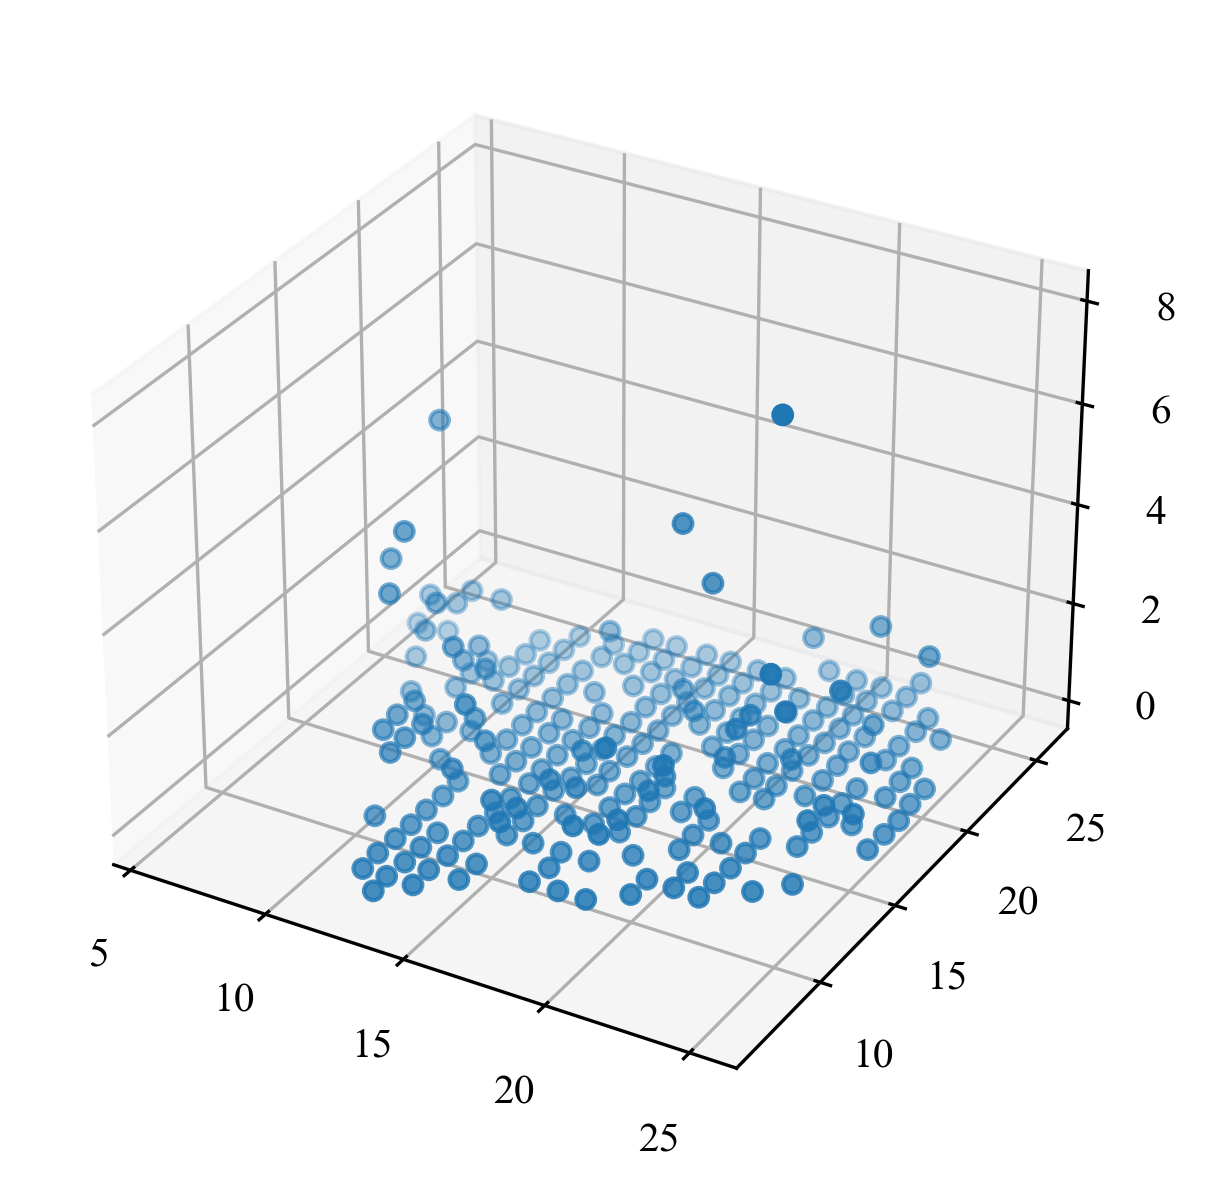

In [7]:
fig = plt.figure(dpi=300)
ax = plt.axes(projection='3d')
ax.scatter(x,y,sample[:,10])


In [8]:
xy = list(zip(x,y))

In [9]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import cm
#%matplotlib qt5
h = sample[:,10]
xy_train, xy_test, h_train, h_test = train_test_split(xy,h, test_size=0.2)
len(xy_train),len(xy_test),len(h_train),len(h_test)

(203, 51, 203, 51)

/Users/fanli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.13562e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


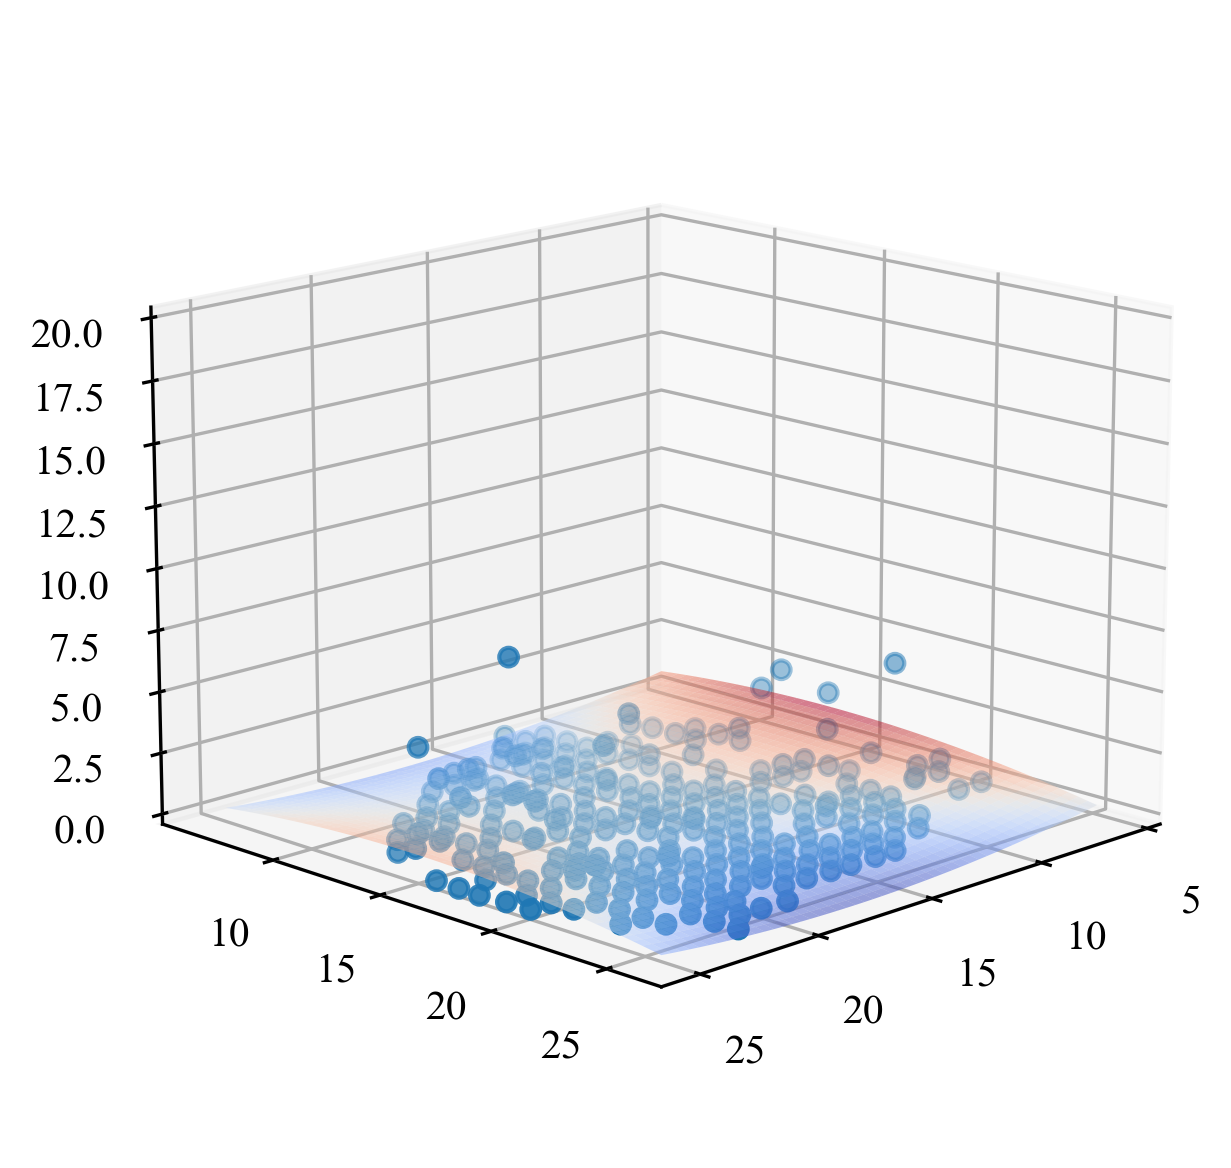

In [10]:
# 创建一个Ridge模型并拟合数据
model = make_pipeline(PolynomialFeatures(2), Ridge(alpha=1e-10))
#model = Ridge()
model.fit(xy_train, h_train)
# 预测新的高度值
x_new = np.linspace(x.min(), x.max(), num=50)
y_new = np.linspace(y.min(), y.max(), num=50)
X_new, Y_new = np.meshgrid(x_new, y_new)
h_new = model.predict(np.column_stack((X_new.ravel(), Y_new.ravel()))).reshape(X_new.shape)

# 绘制二维曲面
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(0,20)
ax.plot_surface(X_new, Y_new, h_new, alpha=0.5,cmap=cm.coolwarm)
ax.scatter(x,y,sample[:,10])
ax.view_init(elev=15, azim=45)
plt.show()

In [11]:
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

In [12]:
evaluate_regression(h_test,model.predict(xy_test))

(0.7279853433132496, 0.8532205713139186, 0.0861535338041689)

(254, 7997)
(250, 7712)


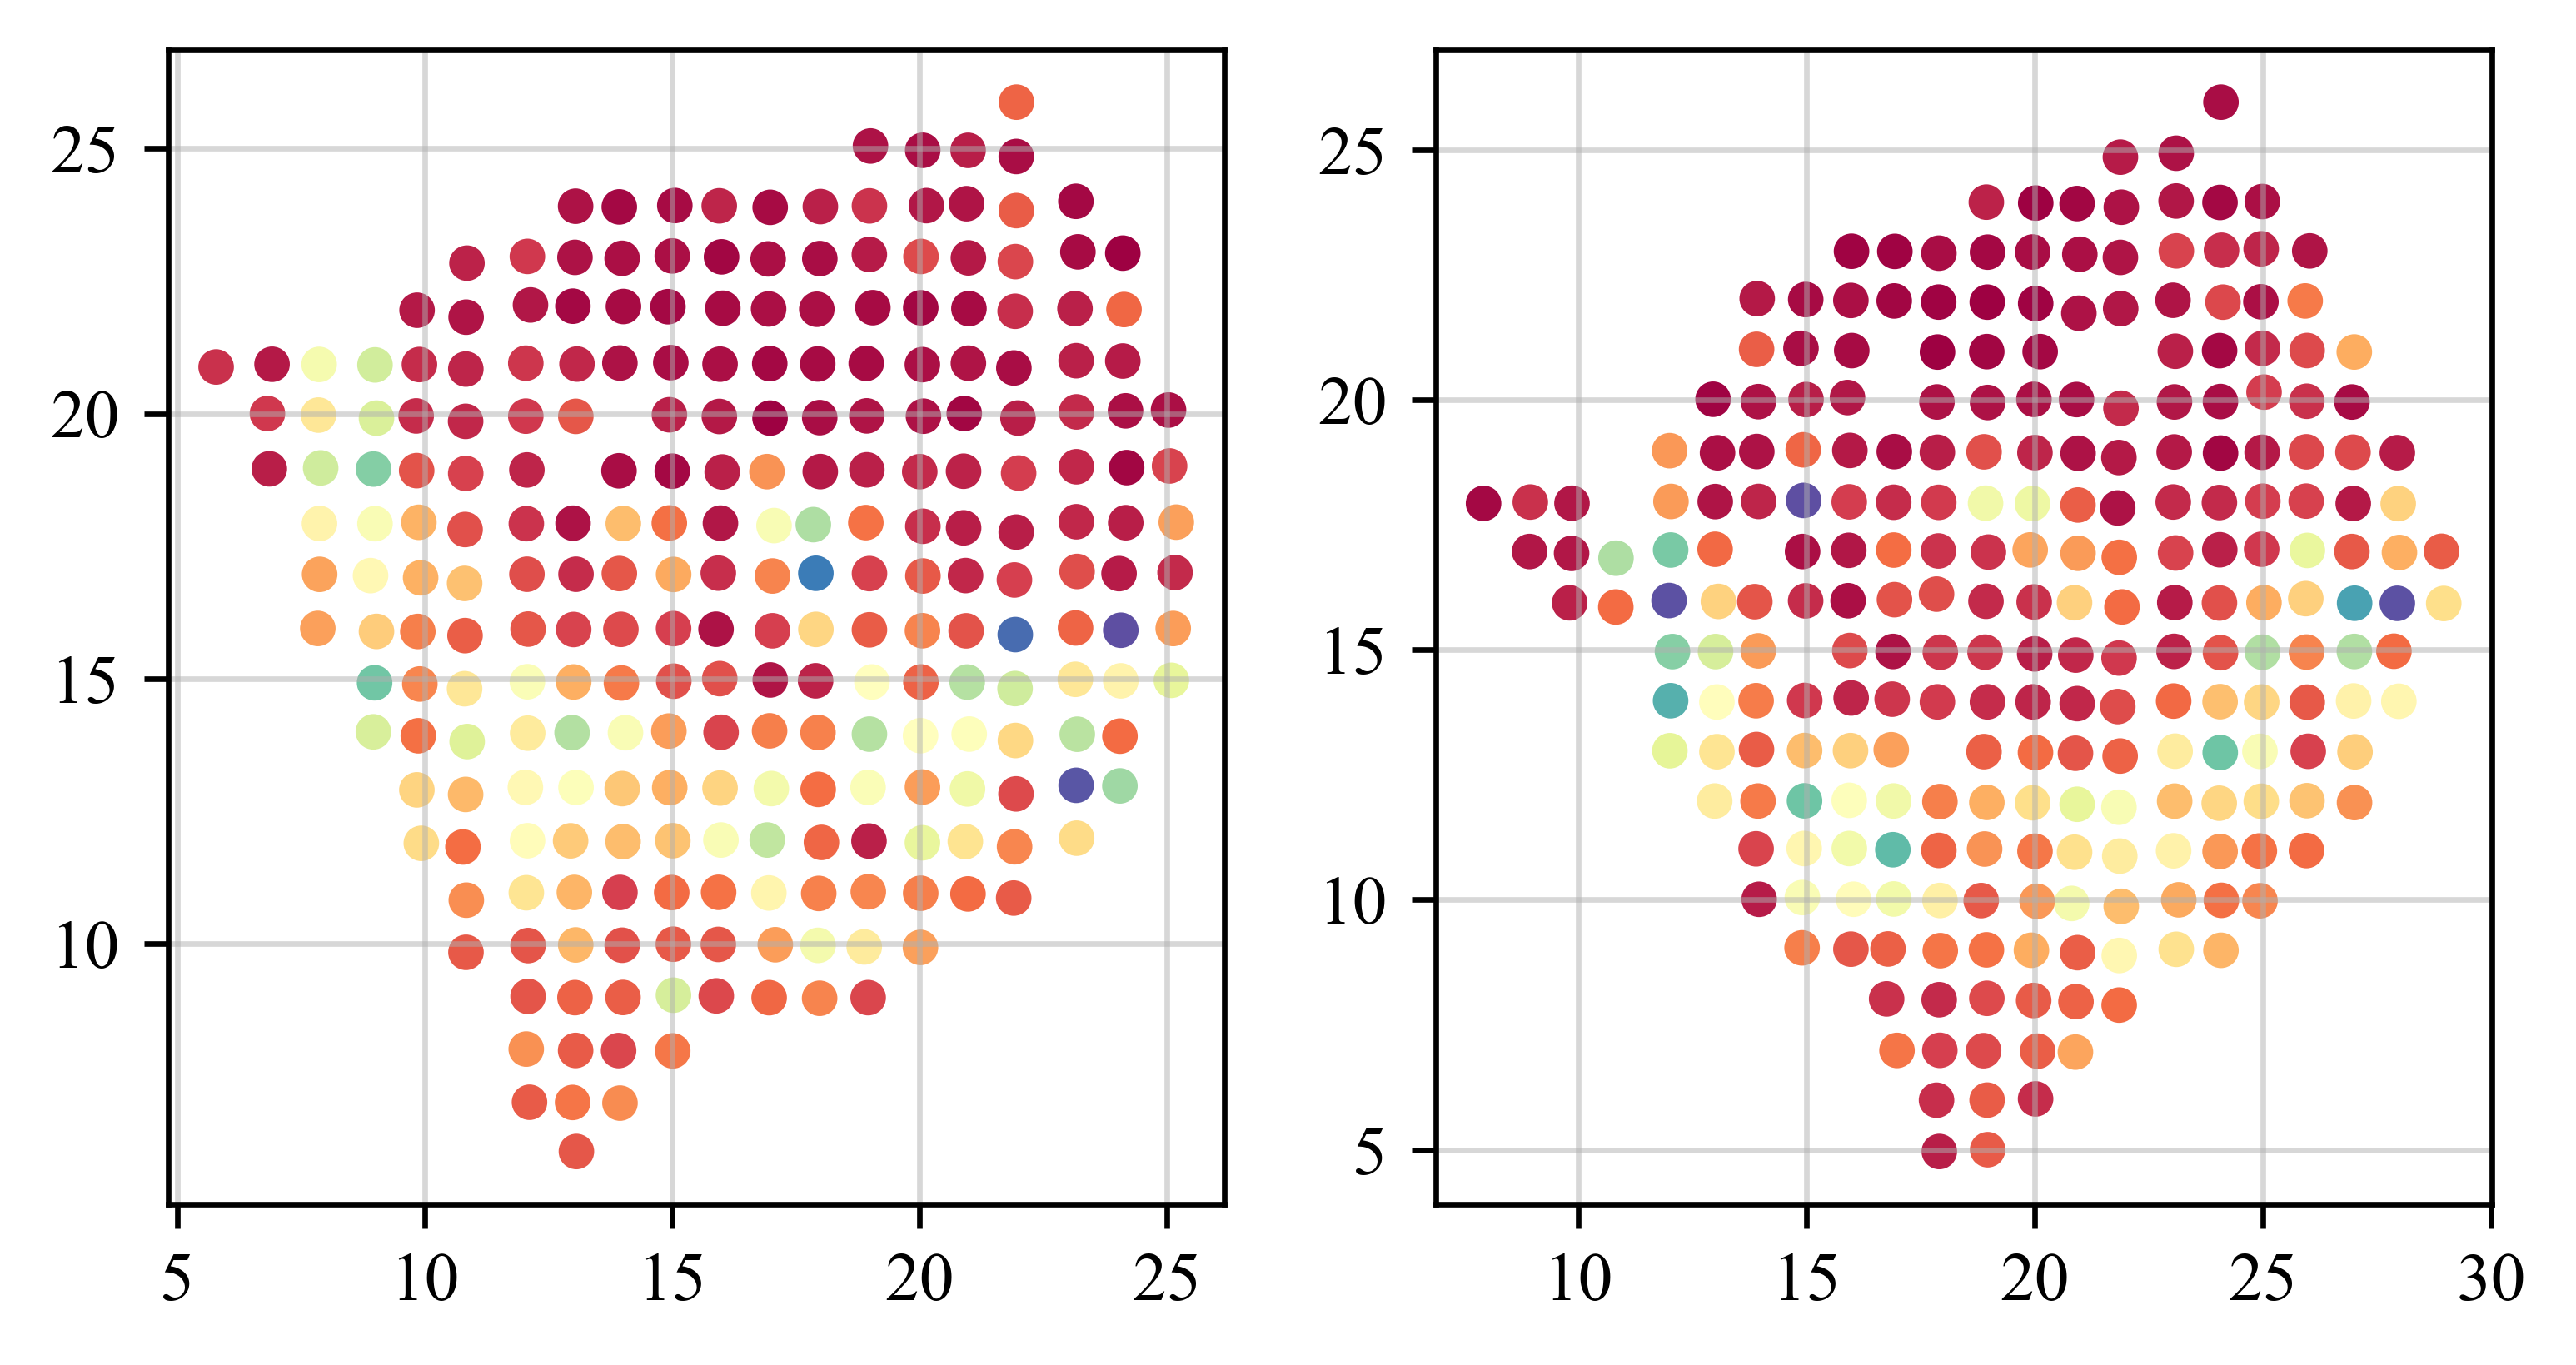

In [13]:
import seaborn as sns
fig,ax = plt.subplots(1,2,figsize=(6,3),dpi=600)
for i in [0,1]:
    sample = data[i]
    gene = sample[:,3:]
    print(gene.shape)
    xy = sample[:,:2]
    x = xy[:,0]
    y = xy[:,1]
    ax[i].grid(alpha=0.5)
    ax[i].scatter(x,y,c=np.average(gene,axis=1),cmap = sns.color_palette("Spectral", as_cmap=True),s=17)
#         ax[i][j].set_xlim(5,30)
#         ax[i][j].set_ylim(4,27)
#plt.savefig('Figure/preShow.jpg')


In [14]:
plt.show()

In [15]:
xy.shape,sample.shape,sample[0].shape

((250, 2), (250, 7715), (7715,))

In [16]:
def get_dis(a,b):
    return np.sqrt(np.sum(np.square(a - b)))

In [17]:
dis_mat = np.zeros(shape=(250,250))
gene[0],gene[1]

(array([1., 1., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]))

In [18]:
for i in range(250):
    for j in range(250):
        dis_mat[i][j] = get_dis(gene[i],gene[j])
        

In [19]:
dis_mat

array([[  0.        ,  81.67006796,  94.69952481, ...,  68.62215386,
         65.19202405,  64.34283177],
       [ 81.67006796,   0.        , 100.29955134, ...,  88.53812738,
         89.509776  ,  87.24677644],
       [ 94.69952481, 100.29955134,   0.        , ..., 121.33012816,
        119.98333218, 119.5993311 ],
       ...,
       [ 68.62215386,  88.53812738, 121.33012816, ...,   0.        ,
         54.23098745,  48.83646179],
       [ 65.19202405,  89.509776  , 119.98333218, ...,  54.23098745,
          0.        ,  47.39198244],
       [ 64.34283177,  87.24677644, 119.5993311 , ...,  48.83646179,
         47.39198244,   0.        ]])

<Axes: >

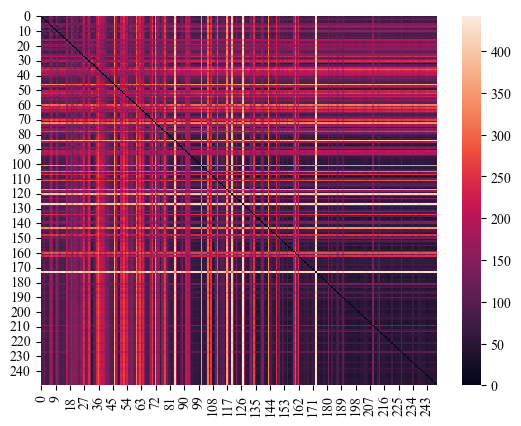

In [20]:
sns.heatmap(dis_mat)

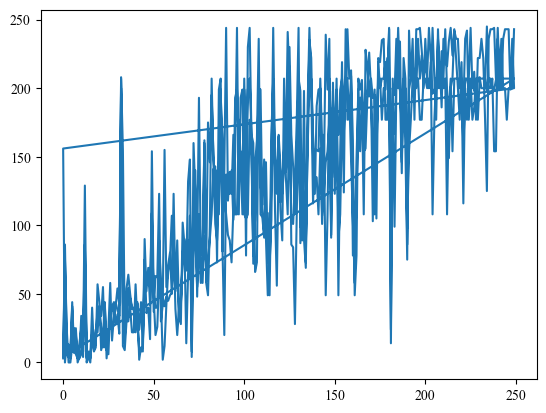

In [21]:
sns.color_palette("rocket_r", as_cmap=True)
min_index = np.array([[np.argsort(line)[1] for line in dis_mat],
            [np.argsort(line)[2] for line in dis_mat],
            [np.argsort(line)[3] for line in dis_mat]])
min_index = np.reshape(min_index,[-1])

# #temp = list(zip(list(range(len(min_index))),min_index))
x = list(range(250))*3
min_index.shape
plt.plot(x,min_index)

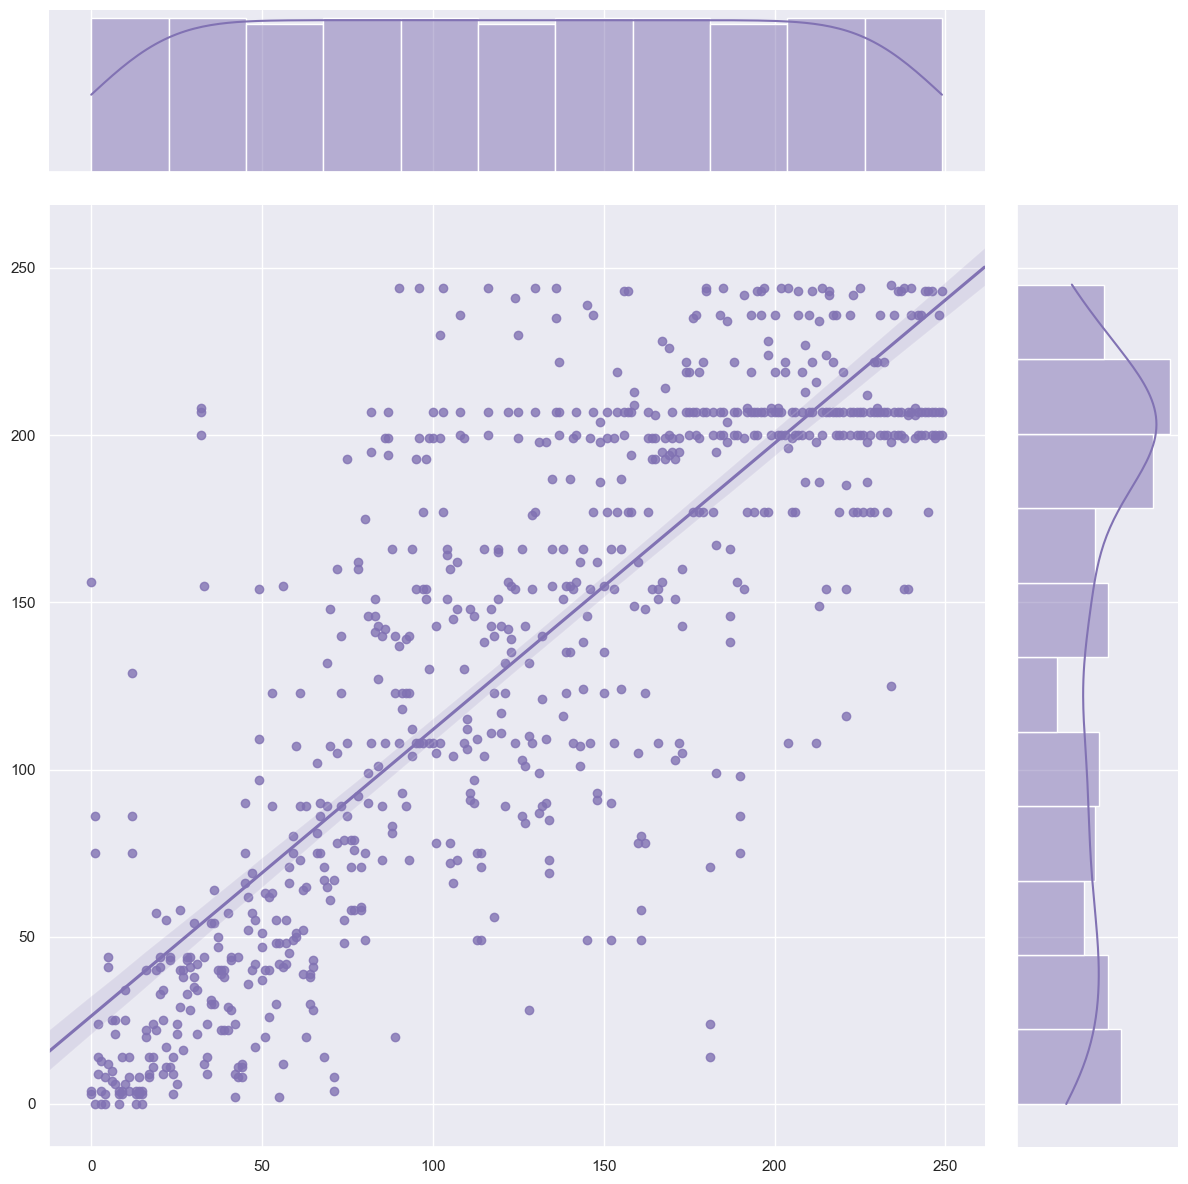

In [22]:
# _, axes = plt.subplots(1, 1, figsize=(12, 6))
# for distribute in min_index:
#     sns.kdeplot(x=x,y=distribute,fill=True,cmap='rocket_r',ax=axes,thresh=0,alpha=0.3,levels=100)
# for distribute in min_index:
#     plt.scatter(x,y=distribute,alpha=0.7,cmap="rocket_r")
# #plt.plot(x,[np.argsort(line)[0] for line in dis_mat])
sns.set_theme(style="darkgrid")
g = sns.jointplot(x=x, y=min_index,
                  kind="reg", truncate=False,
#                   xlim=(0, 250), ylim=(0,5),
                  color="m", height=12)

#plt.show()

In [23]:
import numpy as np
from scipy.spatial.distance import pdist, squareform, cdist

metrics = ['Euclidean Distance','Manhattan Distance','Chebyshev Distance',
#           'DIY',
#            'Minkowski Distance p=1',
#           'Minkowski Distance p=2','Minkowski Distance p=3','Minkowski Distance p=4',
#           'Minkowski Distance p=5',
           'Cosine Similarity',
           #'Hamming Distance',
           'Jaccard Distance',
#          'Correlation Coefficient'
          'DIY']
def distance_metrics(v1, v2, metric_type):
    if metric_type == 'Euclidean Distance':
        return np.linalg.norm(v1 - v2)
    if metric_type == 'Manhattan Distance':
        return np.sum(np.abs(v1 - v2))
    if metric_type == 'Chebyshev Distance':
        return np.max(np.abs(v1 - v2))
    if metric_type == 'Minkowski Distance p=1':
        np.power(np.sum(np.power(np.abs(v1 - v2), 1)), 1)
    if metric_type == 'Minkowski Distance p=2':
        np.power(np.sum(np.power(np.abs(v1 - v2), 2)), 2)
    if metric_type == 'Minkowski Distance p=3':
        np.power(np.sum(np.power(np.abs(v1 - v2), 3)), 3)
    if metric_type == 'Minkowski Distance p=4':
        np.power(np.sum(np.power(np.abs(v1 - v2), 4)), 4)
    if metric_type == 'Minkowski Distance p=5':
        np.power(np.sum(np.power(np.abs(v1 - v2), 5)), 5)
    if metric_type == 'Cosine Similarity':
        return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    if metric_type == 'Hamming Distance':
        return pdist(np.vstack([v1, v2]), 'hamming')[0]
    if metric_type == 'Jaccard Distance':
        return pdist(np.vstack([v1, v2]), 'jaccard')[0]
    if metric_type == 'Correlation Coefficient':
        return np.corrcoef(v1, v2)[0, 1]
    if metric_type == 'DIY':
        return np.min(v1-v2)
    return None
#     metrics = {}
#     metrics['Euclidean Distance'] = np.linalg.norm(v1 - v2)
#     metrics['Manhattan Distance'] = np.sum(np.abs(v1 - v2))
#     metrics['Chebyshev Distance'] = np.max(np.abs(v1 - v2))
#     for p in [1, 2, 3, 4, 5]:
#         metrics[f'Minkowski Distance (p={p})'] = np.power(np.sum(np.power(np.abs(v1 - v2), p)), 1/p)
#     #metrics['Standardized Euclidean Distance'] = np.linalg.norm((v1 - v2) / np.std(np.vstack([v1, v2]), axis=0))
#     #metrics['Mahalanobis Distance'] = mahalanobis_distance = cdist([v1], [v2], 'mahalanobis')[0, 0]
#     metrics['Cosine Similarity'] = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
#     metrics['Hamming Distance'] = pdist(np.vstack([v1, v2]), 'hamming')[0]
#     metrics['Jaccard Distance'] = pdist(np.vstack([v1, v2]), 'jaccard')[0]
#     metrics['Correlation Coefficient'] = np.corrcoef(v1, v2)[0, 1]
#     return metrics

def get_distance_matrix(fea_mat1,fea_mat2,metric_type):
    dis_mat = np.zeros((len(fea_mat1),len(fea_mat2)))
    for i in range(len(fea_mat1)):
        for j in range(len(fea_mat2)):
            dis_mat[i][j] = distance_metrics(fea_mat1[i],fea_mat2[j],metric_type)
    return dis_mat

def plot_reg(x,y,aix):
    sns.set_theme(style="darkgrid")
    sns.kdeplot(x=x,y=y,fill=True,cmap='Reds',levels=60,thresh=0.1,ax=aix)
    aix.scatter(x,y,s=3,alpha=0.5)
    
#     g = sns.jointplot(x=x, y=min_index,
#                   kind="reg", truncate=False,
# #                   xlim=(0, 250), ylim=(0,5),
#                   color="m", height=12,ax=aix)
    
def test_metric(metric_type,feature_mat1,feature_mat2,aix):
    dis_mat = get_distance_matrix(feature_mat1,feature_mat2,metric_type)
    min_index = np.array([[np.argsort(line)[1] for line in dis_mat],
            [np.argsort(line)[2] for line in dis_mat],
            [np.argsort(line)[3] for line in dis_mat]])
    min_index = np.reshape(min_index,[-1])
    #print(min_index)
    x = list(range(250))*3
    plot_reg(x,min_index,aix=aix)

Euclidean Distance
Manhattan Distance
Chebyshev Distance
Cosine Similarity
Jaccard Distance
DIY


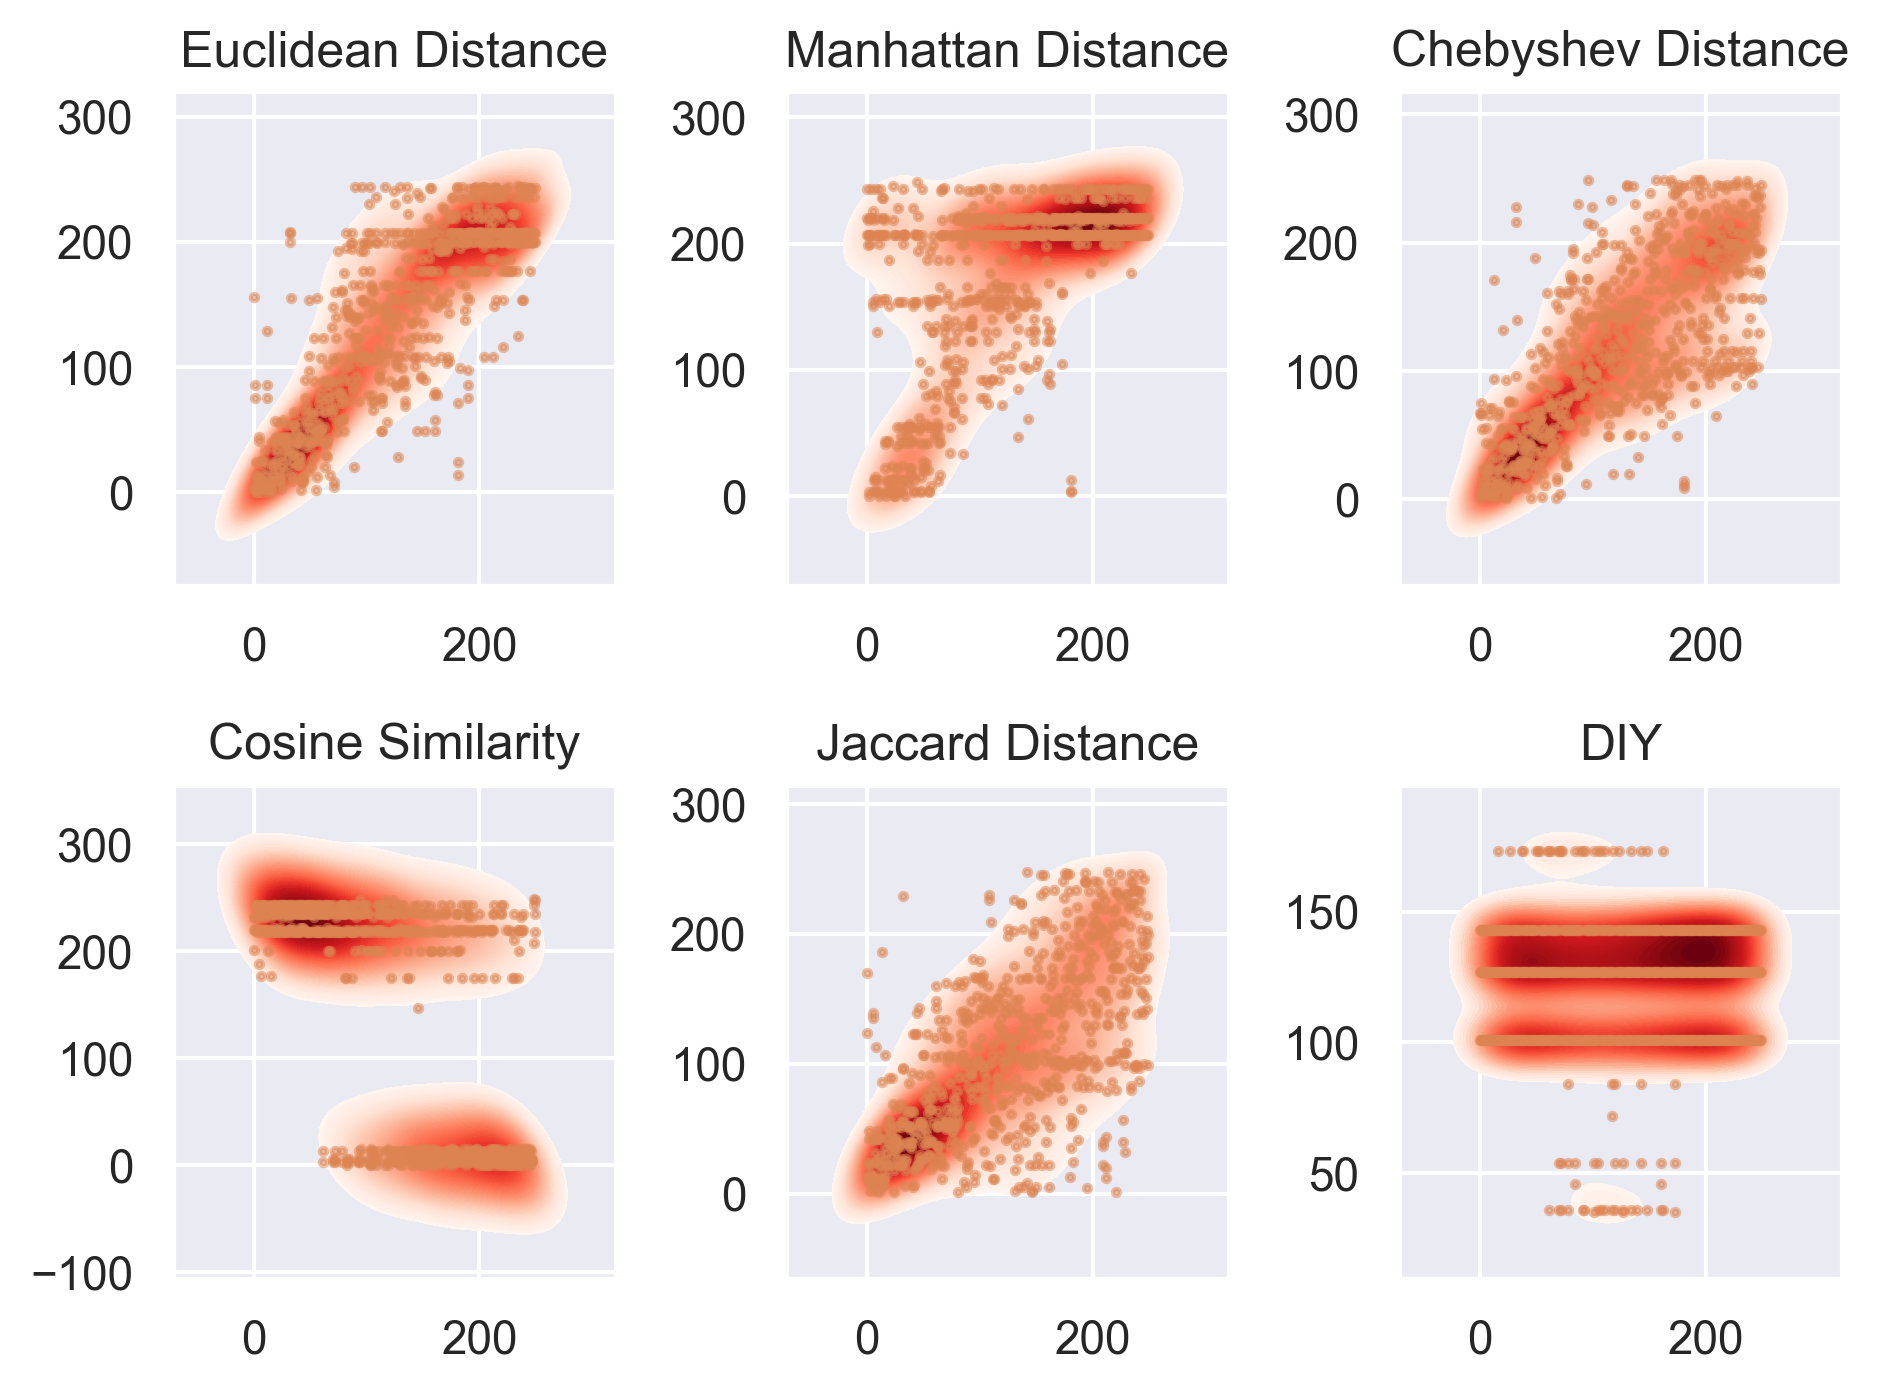

In [24]:
fig,ax = plt.subplots(2,3,dpi=300)
n=0
for i in range(2):
    for j in range(3):
        ax[i][j].set_title(metrics[n])
        print(metrics[n])
        test_metric(metrics[n],gene,gene,ax[i][j])
        n+=1
plt.tight_layout()
plt.show()

In [25]:
for i in range(len(metrics)):
    print(metrics[i])
    print(distance_metrics(gene[0],gene[1],metrics[i]))
    


Euclidean Distance
81.67006795638167
Manhattan Distance
2556.0
Chebyshev Distance
17.0
Cosine Similarity
0.5051810366928651
Jaccard Distance
0.9337349397590361
DIY
-12.0
